In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student.csv')

In [3]:
df.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [4]:
df.tail()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
140,140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB
144,144,5145,18,Female,Private,100%,No,No,Private,12,Always,Yes,No,Yes,No,BB


In [5]:
df.shape

(145, 16)

In [6]:
df.describe()

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,145.000000,145.000000
mean,72.000000,5073.000000,19.682759,2.331034
std,42.001984,42.001984,1.992010,4.249273
min,0.000000,5001.000000,18.000000,0.000000
25%,36.000000,5037.000000,18.000000,0.000000
50%,72.000000,5073.000000,19.000000,0.000000
75%,108.000000,5109.000000,21.000000,2.000000
max,144.000000,5145.000000,26.000000,12.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'Id', 'Student_Age', 'Sex', 'High_School_Type',
       'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')

In [10]:
df = df.drop(df.columns[0],axis=1)

In [11]:
df.shape

(145, 15)

In [12]:
df.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [13]:
df.nunique()

Id                    145
Student_Age             9
Sex                     2
High_School_Type        3
Scholarship             4
Additional_Work         2
Sports_activity         2
Transportation          2
Weekly_Study_Hours      4
Attendance              4
Reading                 2
Notes                   3
Listening_in_Class      3
Project_work            2
Grade                   8
dtype: int64

In [14]:
df['Scholarship'].unique()

array(['50%', '75%', '100%', '25%', nan], dtype=object)

In [15]:
df['Scholarship'] = df['Scholarship'].fillna('0')

In [16]:
df['Scholarship'] = df['Scholarship'].str.replace('%','')
df['Scholarship'] = df['Scholarship'].astype(int)

In [17]:
df = df.drop(['Id','High_School_Type','Scholarship'],axis=1)

In [18]:
df['Attendance'] = df['Attendance'].replace('3','Sometimes')

In [19]:
df['Listening_in_Class'] = df['Listening_in_Class'].replace('6','No')

In [20]:
df['Notes'] = df['Notes'].replace('6','No')

In [21]:
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='int64')

In [22]:
df_num

,Student_Age,Weekly_Study_Hours
0,21,0
1,20,0
2,21,2
3,18,2
4,22,12
...,...,...
140,22,0
141,18,0
142,18,0
143,22,12


In [23]:
df_obj

,Sex,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,Male,Yes,No,Private,Always,Yes,Yes,No,No,AA
1,Male,Yes,No,Private,Always,Yes,No,Yes,Yes,AA
2,Male,No,No,Private,Never,No,No,No,Yes,AA
3,Female,Yes,No,Bus,Always,No,Yes,No,No,AA
4,Male,No,No,Bus,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...
140,Female,Yes,Yes,Private,Always,No,Yes,No,Yes,CC
141,Female,No,No,Private,Never,No,Yes,Yes,No,CC
142,Female,No,No,Private,Always,Yes,No,No,No,AA
143,Female,Yes,Yes,Bus,Sometimes,No,Yes,No,Yes,CB


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_obj.columns:
    df_obj[col] = le.fit_transform(df_obj[col])

In [25]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sex                 145 non-null    int32
 1   Additional_Work     145 non-null    int32
 2   Sports_activity     145 non-null    int32
 3   Transportation      145 non-null    int32
 4   Attendance          145 non-null    int32
 5   Reading             145 non-null    int32
 6   Notes               145 non-null    int32
 7   Listening_in_Class  145 non-null    int32
 8   Project_work        145 non-null    int32
 9   Grade               145 non-null    int32
dtypes: int32(10)
memory usage: 5.8 KB


In [26]:
df_comb = pd.concat([df_obj,df_num],axis=1)
df_comb

,Sex,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,Student_Age,Weekly_Study_Hours
0,1,1,0,1,0,1,1,0,0,0,21,0
1,1,1,0,1,0,1,0,1,1,0,20,0
2,1,0,0,1,1,0,0,0,1,0,21,2
3,0,1,0,0,0,0,1,0,0,0,18,2
4,1,0,0,0,0,1,0,1,1,0,22,12
...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,1,1,1,0,0,1,0,1,4,22,0
141,0,0,0,1,1,0,1,1,0,4,18,0
142,0,0,0,1,0,1,0,0,0,0,18,0
143,0,1,1,0,2,0,1,0,1,3,22,12


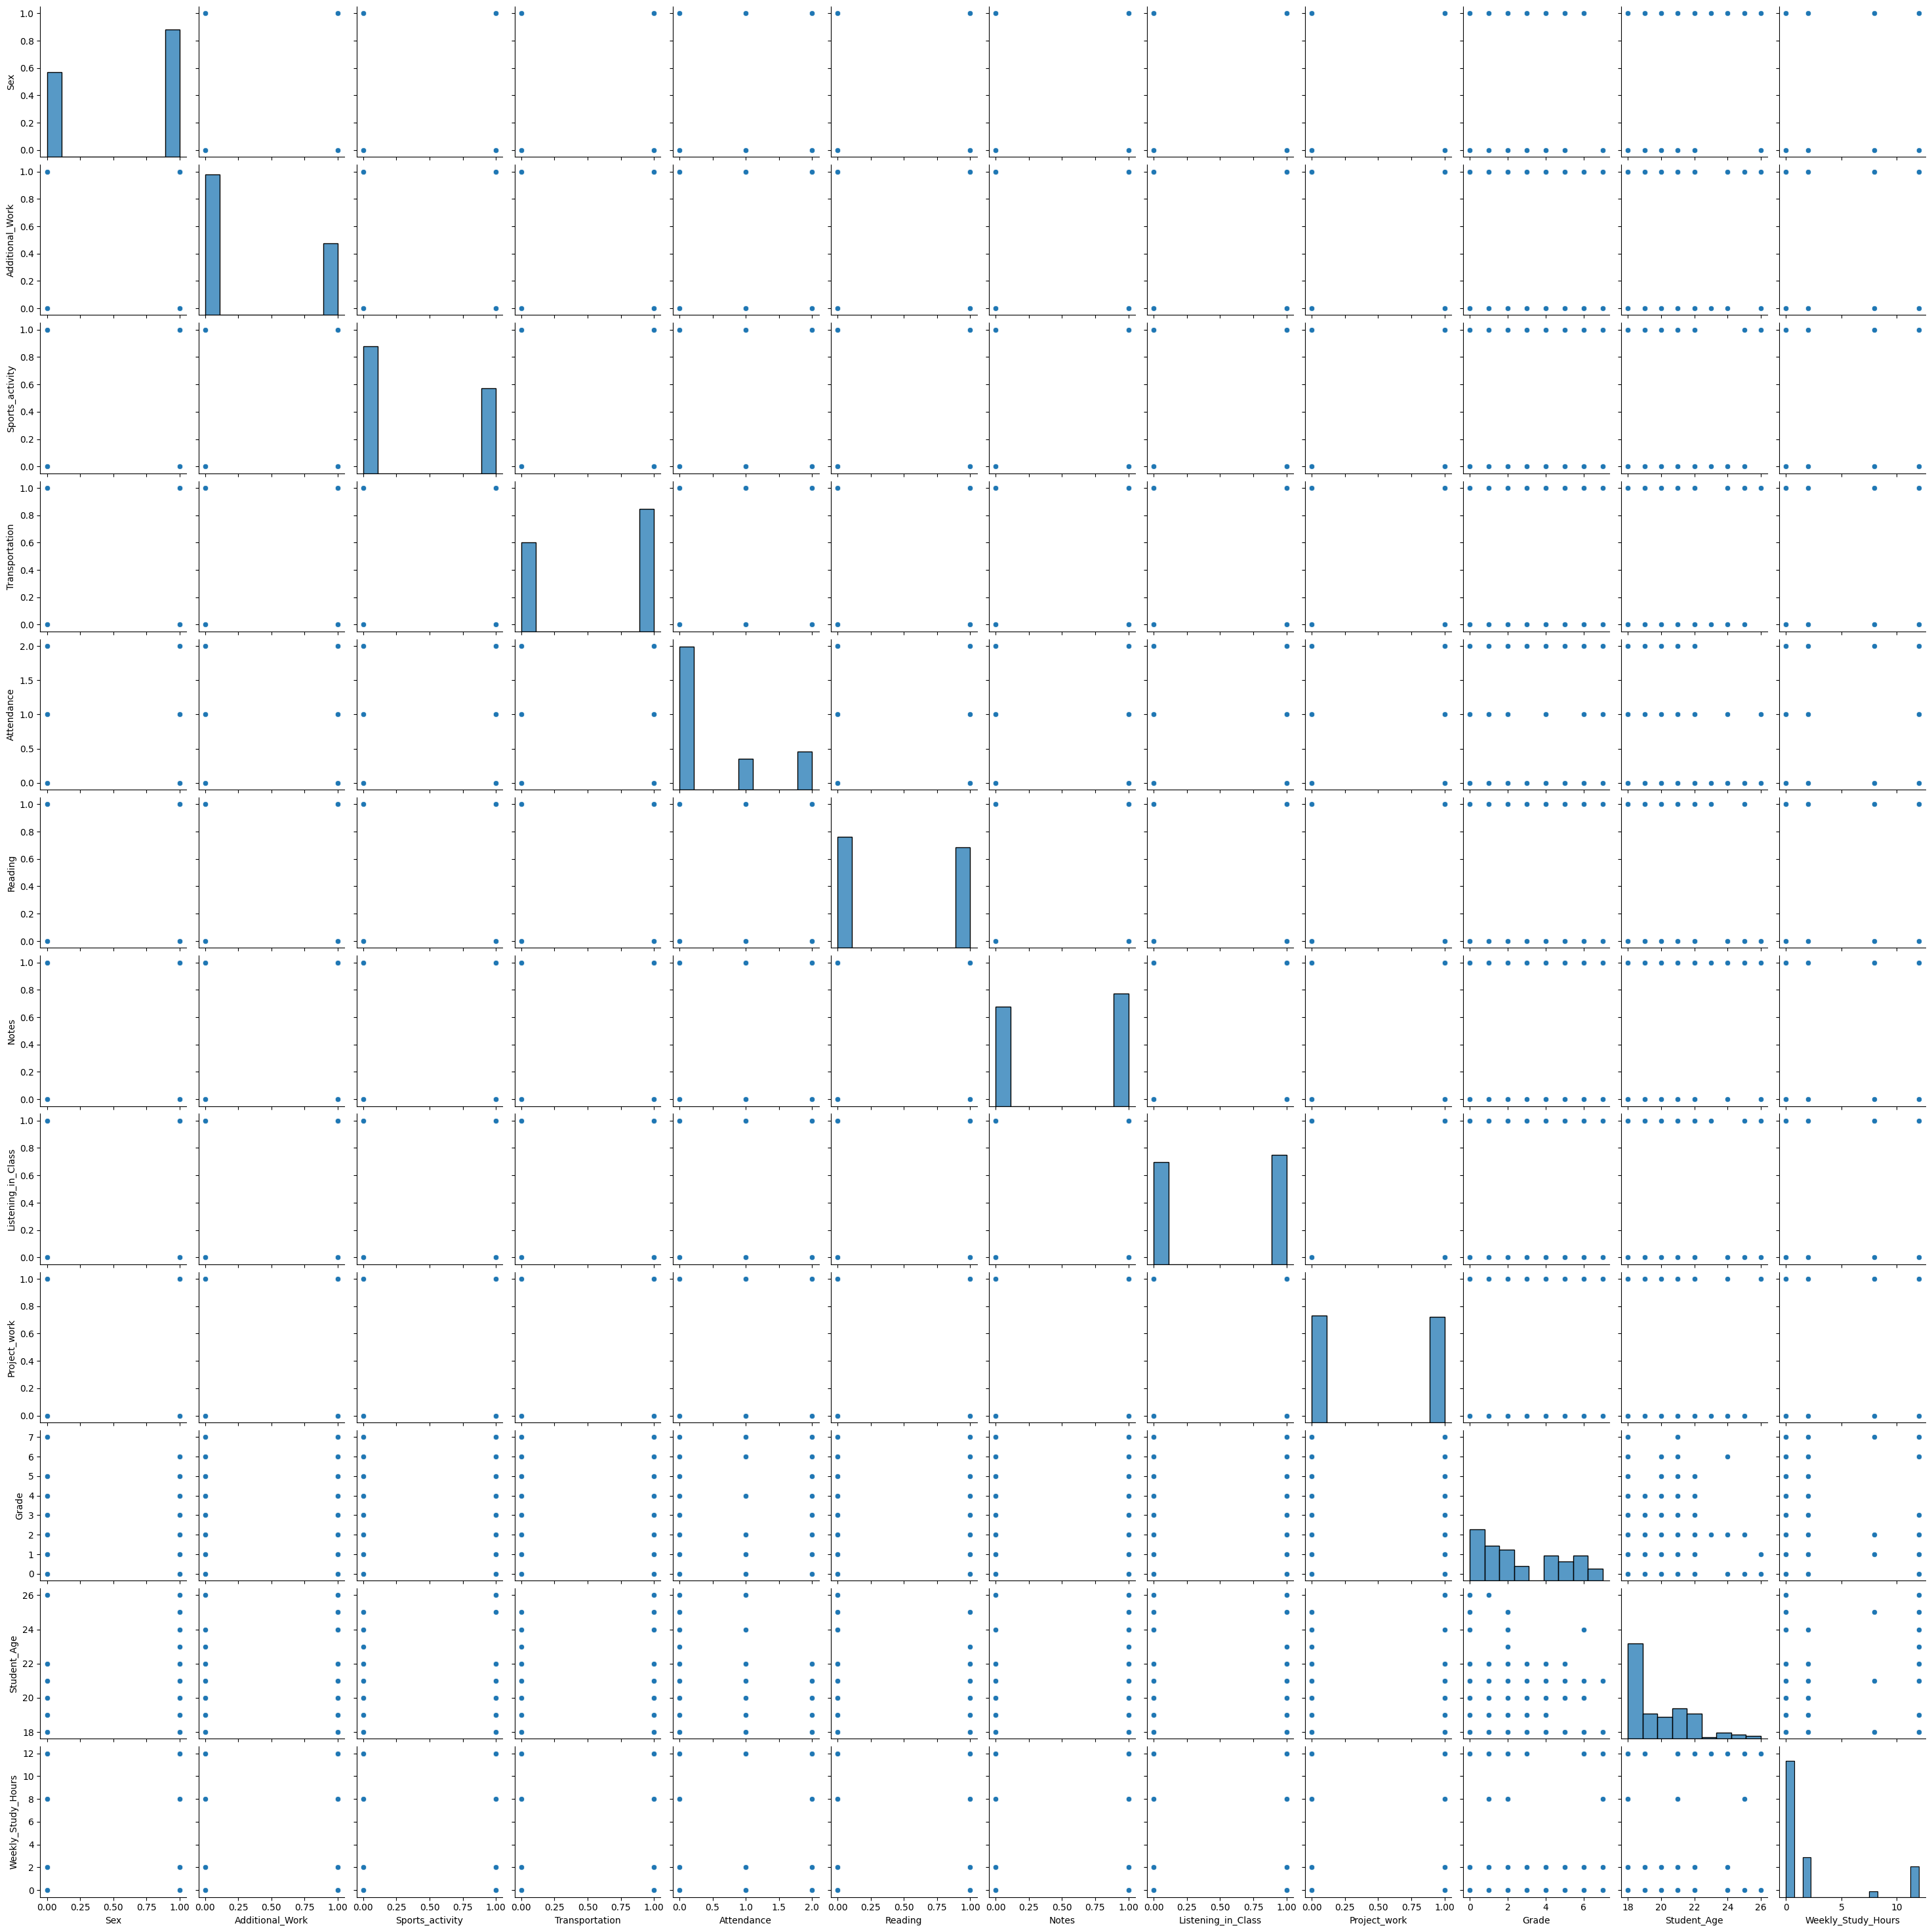

In [42]:
sns.pairplot(df_comb)

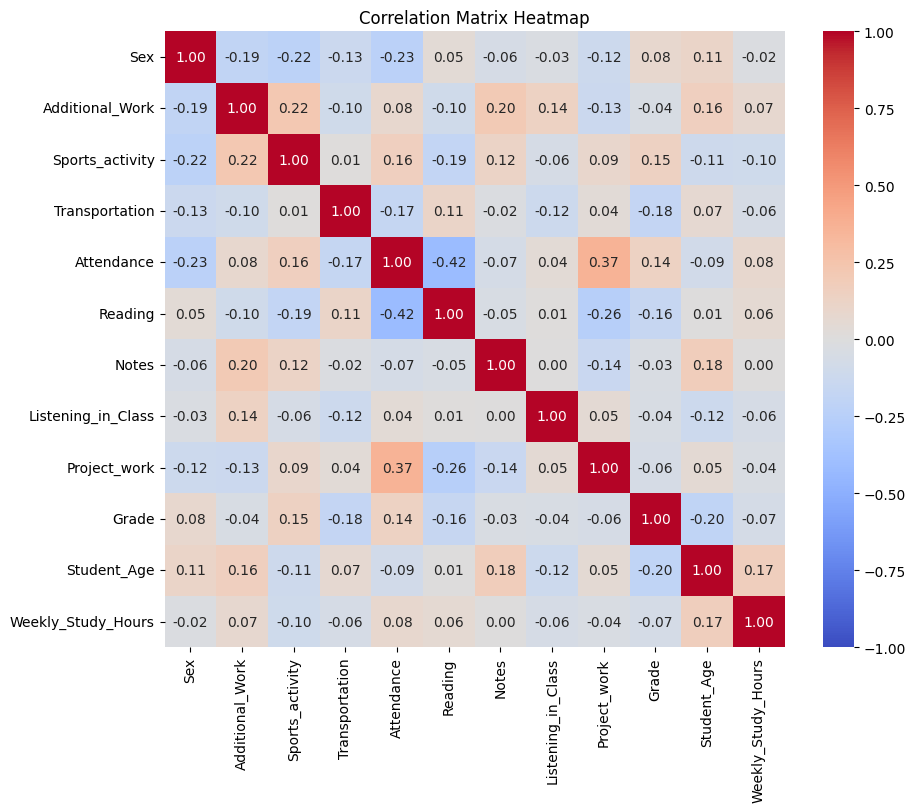

In [28]:
cor = df_comb.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
x = df_comb.drop('Grade',axis=1)
y = df_comb['Grade']

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

reg = LogisticRegression()
naive = MultinomialNB()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100,max_depth=5)

reg.fit(xtrain,ytrain)
naive.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=5)

In [35]:
yr = reg.predict(xtest)
yn = naive.predict(xtest)
yt = tree.predict(xtest)
yf = rf.predict(xtest)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Logistic Regression : \n{confusion_matrix(yr,ytest)} \n{accuracy_score(yr,ytest)}')
print(f'Naive Bayes : \n{confusion_matrix(yn,ytest)} \n{accuracy_score(yn,ytest)}')
print(f'Decision tree : \n{confusion_matrix(yt,ytest)} \n{accuracy_score(yt,ytest)}')


Logistic Regression : 
[[2 3 3 2 3 2 2 3]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 1]] 
0.1724137931034483
Naive Bayes : 
[[0 0 2 1 1 1 1 0]
 [0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [3 1 2 0 1 3 0 3]
 [0 1 0 2 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 1]] 
0.10344827586206896
Decision tree : 
[[0 0 2 0 1 1 1 1]
 [1 1 2 3 1 0 0 0]
 [1 1 2 0 1 1 0 2]
 [1 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]] 
0.1724137931034483


In [40]:
print(f'Random Forest: \n{confusion_matrix(yf,ytest)} \n{accuracy_score(yf,ytest)}')

Random Forest: 
[[1 2 1 2 1 2 1 2]
 [1 1 1 0 1 0 0 1]
 [1 0 2 0 1 0 1 0]
 [0 1 1 0 0 0 0 0]
 [0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]] 
0.1724137931034483
